# Week 5: Day 1 - Hypothesis Testing


Hypothesis testing is a form of statistical inference that uses data from a sample to draw conclusions about a population parameter or a population probability distribution. First, a tentative assumption is made about the parameter or distribution. This assumption is called the null hypothesis and is denoted by H0.

## Test the difference between 2 groups

t-test assesses whether the means of two groups are statistically different from each other. This analysis is appropriate whenever you want to compare the means of two group

In [9]:
# Import necessary libraries

%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats 
import seaborn as sns

import statsmodels.api as sm

from sklearn import linear_model

In [10]:
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

In [11]:
import scipy.stats as stats


In [12]:
# load the data into a pandas dataframe
iris =sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## One-sided t-test

### null hypothesis: expected mean value of sepal length = 17

### reject H0 if p is less than 0.05

In [14]:
t_statistic, p_value = ttest_1samp (iris["sepal_length"], 17)

In [17]:
print("one-sample t-test", p_value)

one-sample t-test 1.3547273241940764e-170


In [18]:
#p_value < 0.05 alternative hypothesis.
# data deviate significantly from the hypothesis that the mean
# is 17 at the 5% Level of significance

### t-tests can be applied when the data are normally distributed (these are parametric tests)
### so test for normality

In [19]:
# Importing the scipy package
import scipy

In [21]:
shapiro_results= scipy.stats.shapiro(iris["sepal_length"])

In [22]:
print(shapiro_results)

ShapiroResult(statistic=0.9760899543762207, pvalue=0.010180278681218624)


In [23]:
# reject He


### in case of non-normal data distributions

### non-parametric tests

In [25]:
# one sample wilcoxon-test

z_statistic, p_value= wilcoxon (iris["sepal_length"] - 17)
print("one-sample wilcoxon-test", p_value)

one-sample wilcoxon-test 2.2413414061128356e-26


### two-sample t-test

### null hypothesis: the two groups have the same mean

In [28]:
t_statistic, p_value=ttest_ind(iris["sepal_length"], iris["petal_length"])

In [29]:
print("two-sample t-test", p_value)

two-sample t-test 2.8571040695819004e-31


In [33]:
# two-sample wilcoxon test (non-parametric) 
# a.k. Mann Whitney U 
u, p_value = mannwhitneyu(iris["sepal_length"], iris["petal_length"])
print("two-sample silcoxon-test", p_value)


two-sample silcoxon-test 8.512650733764521e-27


### paired t-test

In [40]:
# paired t-test: doing two measurments on the same experimental unit
# eg., before and after a treatment

t_statistic, p_value = ttest_1samp(iris["sepal_length"],iris["petal_length"], 0)


In [42]:
# p<0.05 => alternative hypothesis: 
# the difference in mean is not equal to 0

print("paired t-test", p_value)


paired t-test [6.18205061e-112 6.18205061e-112 2.49827529e-113 1.63765117e-110
 6.18205061e-112 1.42624160e-107 6.18205061e-112 1.63765117e-110
 6.18205061e-112 1.63765117e-110 1.63765117e-110 4.65735395e-109
 6.18205061e-112 4.95287880e-116 1.07790759e-114 1.63765117e-110
 2.49827529e-113 6.18205061e-112 1.42624160e-107 1.63765117e-110
 1.42624160e-107 1.63765117e-110 2.41785525e-117 1.42624160e-107
 1.69178248e-104 4.65735395e-109 4.65735395e-109 1.63765117e-110
 6.18205061e-112 4.65735395e-109 4.65735395e-109 1.63765117e-110
 1.63765117e-110 6.18205061e-112 1.63765117e-110 1.07790759e-114
 2.49827529e-113 6.18205061e-112 2.49827529e-113 1.63765117e-110
 2.49827529e-113 2.49827529e-113 2.49827529e-113 4.65735395e-109
 1.69178248e-104 6.18205061e-112 4.65735395e-109 6.18205061e-112
 1.63765117e-110 6.18205061e-112 1.74592348e-036 9.95056952e-044
 7.87058445e-029 8.76459244e-060 3.65378139e-040 9.95056952e-044
 1.74592348e-036 5.84830550e-078 3.65378139e-040 1.16642897e-062
 3.36078584

In [44]:
# alternative to paired t-test when data has an ordinary scale or when not 
#normally distributed
z_statistic, p_value = wilcoxon(iris["sepal_length"] - iris["petal_length"])

print("paired wilcoxon-test", p_value)

paired wilcoxon-test 2.2611505488375926e-26


### ANOVA

#### Our null hypothesis states that there are equal means in the populations from which the groups of data were sampled

In [46]:
# Import necessary libraries
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats 
import seaborn as sns

import statsmodels.api as sm

from sklearn import linear_model 

import scipy.stats as stats

In [47]:
#Load the data into a pandas dataframe 
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

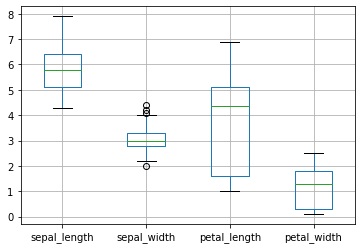

In [48]:
iris.boxplot()

### One way ANOVA

### test if the 3 variables are significantly different or not?

In [51]:
F, p = stats.f_oneway(iris["sepal_length"], iris["petal_length"],iris['sepal_width'])

In [65]:
print("anova", p_value)


anova 2.2611505488375926e-26


#### see if sepal length is significantly different for the 3 species or not

<AxesSubplot:title={'center':'sepal_length'}, xlabel='species'>

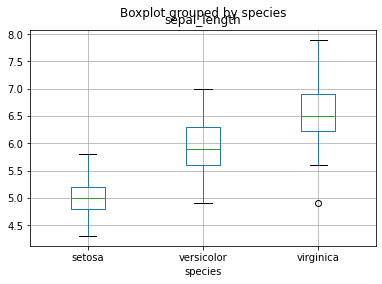

In [56]:
iris.boxplot("sepal_length", by='species')

In [59]:
grps = pd.unique(iris.species.values) #group data by the species name. Use unique 
d_data = {grp:iris["sepal_length"][iris.species == grp] for grp in grps}

In [60]:
F, p = stats.f_oneway (d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [62]:
print("anova", p_value)

anova 2.2611505488375926e-26


In [66]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [68]:
mod = ols('sepal_length ~ species', data=iris).fit() # see if sepal lenght is significantly different across species or not

aov_table=sm.stats.anova_lm(mod, typ=1)
print(aov_table)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


### the sepal length of which of the species is different?

### post hoc test (tukey hsd)

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels.stats.multicomp import MultiComparison

In [73]:
mc = MultiComparison(iris["sepal_length"], iris["species"])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93 0.001 0.6862 1.1738   True
    setosa  virginica    1.582 0.001 1.3382 1.8258   True
versicolor  virginica    0.652 0.001 0.4082 0.8958   True
---------------------------------------------------------
['setosa' 'versicolor' 'virginica']


In [74]:
# the sepal length of all 3 species is significantly different 
#difference between setosa nad virginica is the greatest

### 2 way ANOVA

### whether our response variable in question (quantitative) is related to the two other factor variables

In [76]:
data = pd.read_csv('ToothGrowth.csv')

In [77]:
data.head(5)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


### do supp and dose influence tooth growth?

### len=supp+dose+supp*dose

In [78]:
import statsmodels 
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [81]:

formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols (formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN
